# Exercise sheet 4
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **11/05/2022** - 15 points in total

---



## Chapter 7: Clustering 


### A. K-Means and EM (9pt)

*Topics: clustering, unsupervised learning*

**Reading Material: Murphy 11.4, and especially 11.4.2 and especially especially 11.4.2.5**

In this exercise, we will be implementing the K-means clustering algorithm by hand. Although efficient algorithms (that you should definitely use for your own projects!) are implemented in `scikit-learn`, sometimes it's helpful to see how things work by writing your own implementation.

We will work with some previously generated data. 


Text(0, 0.5, '$x_2$')

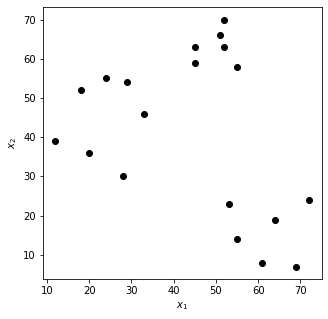

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Some previously geenerated random data in 2 dimensions
data = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]]).T

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

1. Take a look at the plot of our datapoints. Generate initial random values for the centroids (means) such that they are randomly distributed throughout the whole data space. Use $k=3$. Your centroids should be stored as a $k \times 2$ numpy arrays, with each row giving the $x_1, x_2$ values of the centroid. Plot a scatter plot of the data along with your centroids in red, green, and blue. (2pt)

In [ ]:
#Here we create the centroids that are radnomly distributed in data space using random normal around 40 which is the middle of every dimension
centroids=np.zeros((3,2))
for i in range (3):
  for j in range (2):
    a=np.random.normal(loc=40,scale=20)
    centroids[i,j]=a


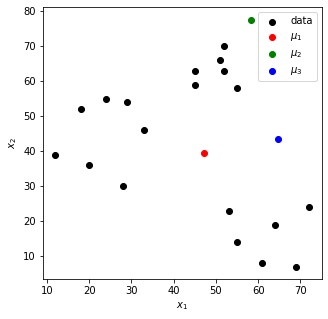

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k',label='data')
plt.scatter(centroids[0,0],centroids[0,1],marker='o',color='red',label=r'$\mu_1$')
plt.scatter(centroids[1,0],centroids[1,1],marker='o',color='green',label=r'$\mu_2$')
plt.scatter(centroids[2,0],centroids[2,1],marker='o',color='blue',label=r'$\mu_3$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()


2. (Assignment/Expectation) Define the function `closest_centroid`, which should return an array giving the index (0, 1, or 2) of the closest centroid for each datapoint. This function will tell us which centroid is closest. This function plays the same role as 

$$r_{n k}=\left\{\begin{array}{ll}
1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} , \\
0 & \text { otherwise } .
\end{array}\right.$$

(although returning directly $k$, not the one-hot encoding).

Hint: `np.argmin` could be useful here. (2pt)



In [ ]:
def closest_centroid(k, data, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    dist=np.zeros((len(data),k))
    for i in range (len(data)):
      for j in range (k):
        dist[i,j]=np.matmul((data[i,:]-centroids[j,:]),(data[i,:]-centroids[j,:]))
    
    a=np.argmin(dist,axis=1)

    return a

    

In [ ]:
#Here we test if the function works
a=closest_centroid(3,data,centroids)
print(a)

[0 0 0 0 0 0 0 0 1 1 1 1 2 0 0 0 2 2 2]


3. (Moving Centroids/Maximization) Define the function `move_centroids` which should return the new values of the means i.e. centroids, given the previous assignments. This function is equivalent to
$$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}.$$ (1pt)

In [ ]:
def move_centroids(data, closest, k):
    """returns the new centroids assigned from the points closest to them"""
    new_centroids=np.zeros((k,data.shape[1]))
    #we turn the closest matrix into one hot encoding
    one_hot=[]
    for i in range(len(closest)):
      if (closest[i]==0):
        one_hot.append([1,0,0])
      if (closest[i]==1):
        one_hot.append([0,1,0])
      if (closest[i]==2):
         one_hot.append([0,0,1])
    one_hot=np.reshape(one_hot,(len(closest),k))

    
    #now we are calculating the matrix with the new centroids
    for i in range(k):
      alpha=sum(one_hot[:,i])
      beta=np.matmul(one_hot[:,i],data)
      new_centroids[i,:]=beta/alpha

    return new_centroids



In [ ]:
#Here I test if my function works
new=move_centroids(data,a,3)
print(new)

[[34.36363636 37.81818182]
 [50.         65.5       ]
 [65.         27.        ]]


4. (Iteration) Now we are ready to put our E and M steps together. Decide on a termination criterion, and run your training. This should be only a few steps. At each training step, visualize the assignments of the data points to their respective centroid in plots. (2pt)

In [ ]:
def k_means(l,k,data,initial):
  initial=centroids
  for i in range(l):
    r=closest_centroid(3,data,initial)
    new_cent=move_centroids(data,r,3)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(data[:,0], data[:,1], color='k',label='data')
    plt.scatter(new_cent[0,0],new_cent[0,1],marker='o',color='red',label=r'$\mu_1$')
    plt.scatter(new_cent[1,0],new_cent[1,1],marker='o',color='green',label=r'$\mu_2$')
    plt.scatter(new_cent[2,0],new_cent[2,1],marker='o',color='blue',label=r'$\mu_3$')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend()
    plt.show()
    if(initial.all==new_cent.all):
      break
    initial=new_cent
 


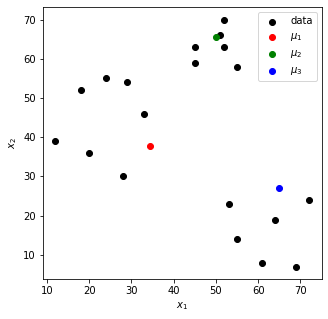

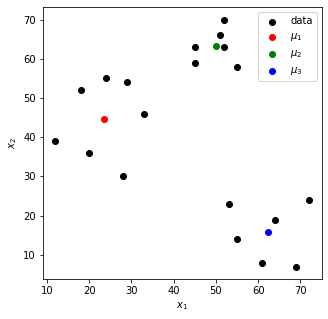

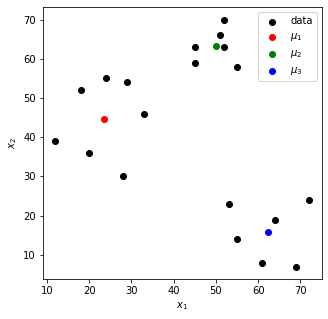

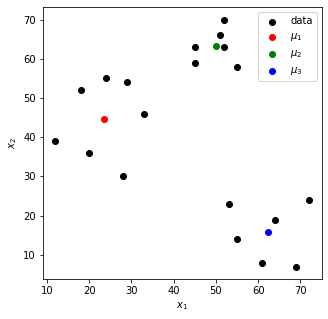

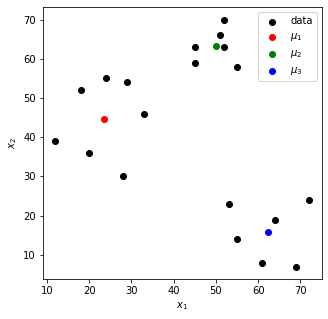

In [ ]:
k_means(5,3,data,centroids)

5. Discuss briefly when the algorithm does or does not converge. (1 pt)

The algorithm converges when the centroids stop moving.

6. Now load the data below and run your K-means algorithm again for $k=3$. Do you obtain good results? How would a method using Gaussian mixture models perform differently? (1 pt)

In [ ]:
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv

--2022-05-11 10:29:41--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99600 (97K) [text/plain]
Saving to: ‘data_mouse.csv’

data_mouse.csv      100%[===================>]  97.27K  --.-KB/s    in 0.01s   

2022-05-11 10:29:41 (6.75 MB/s) - ‘data_mouse.csv’ saved [99600/99600]



Text(0, 0.5, '$x_2$')

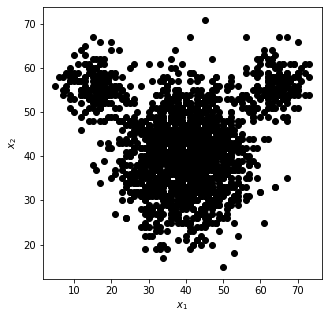

In [ ]:
data_mouse = pd.read_csv('/content/data_mouse.csv')
data_mouse = data_mouse.to_numpy()

fig = plt.figure(figsize=(5, 5))
plt.scatter(data_mouse[:,0], data_mouse[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

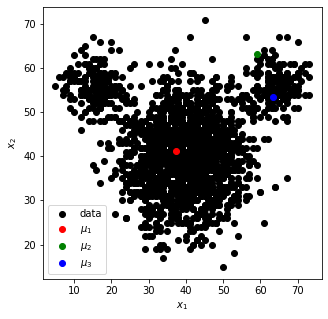

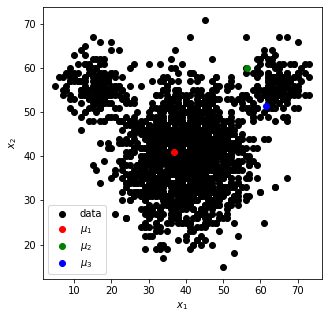

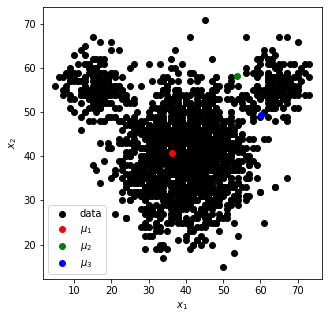

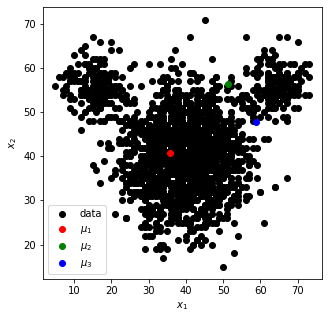

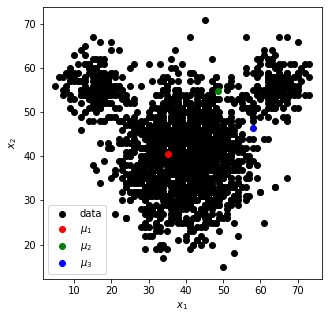

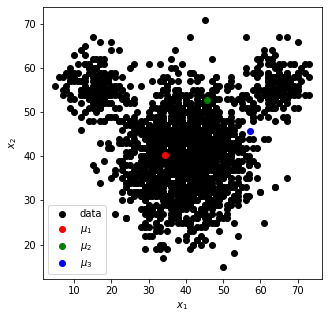

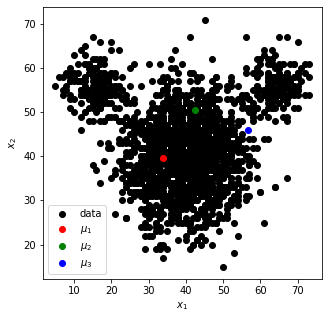

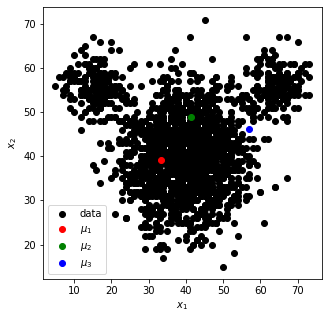

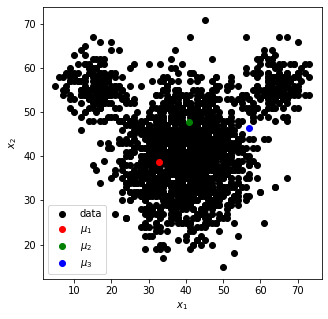

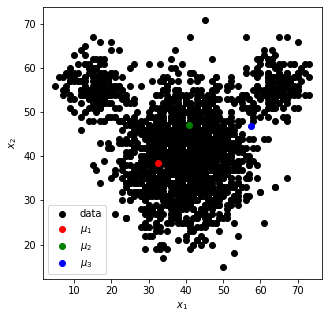

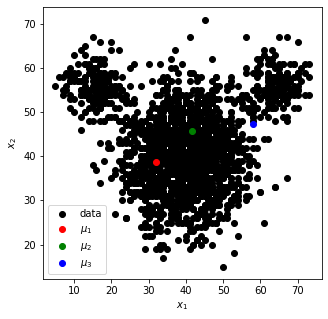

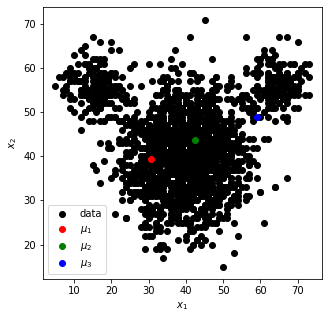

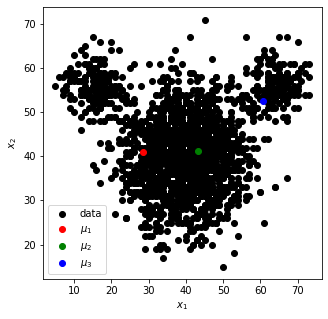

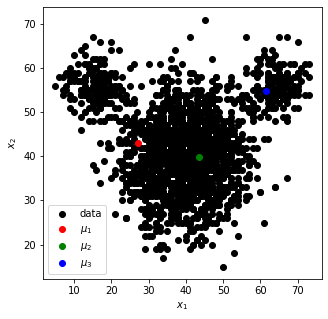

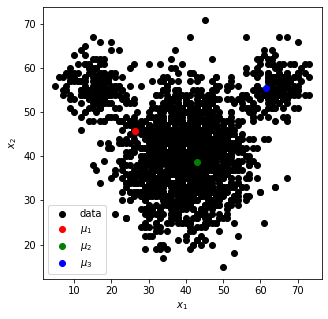

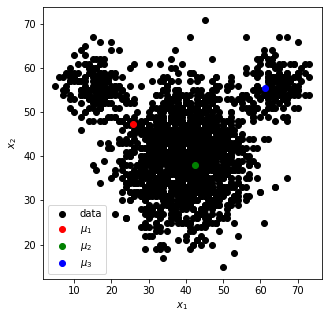

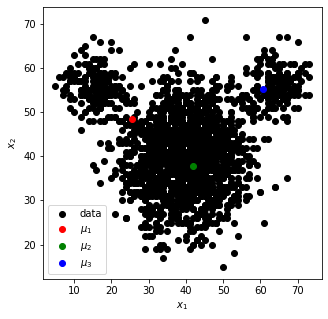

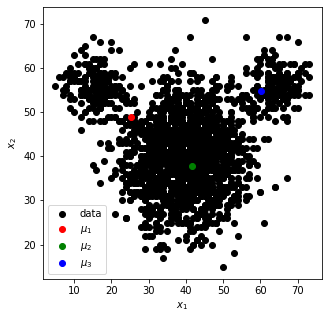

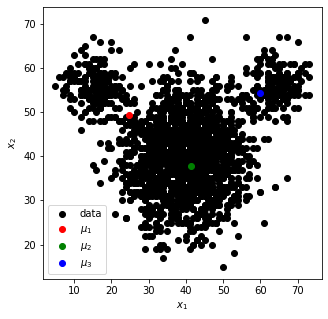

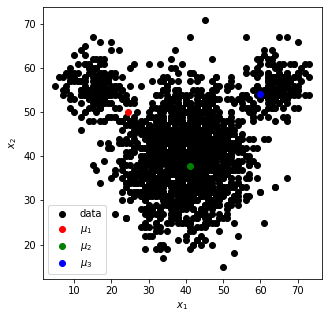

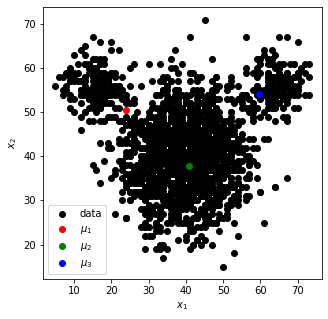

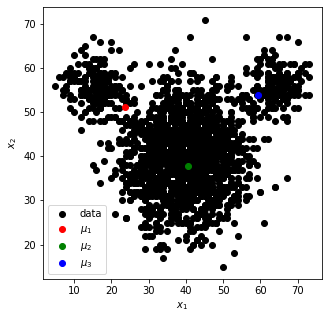

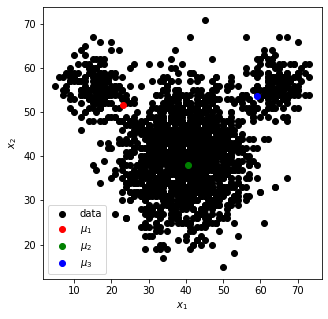

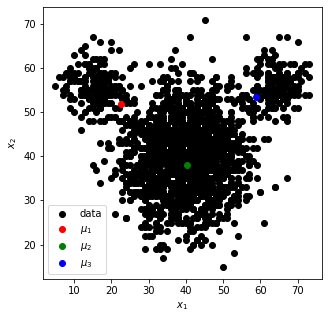

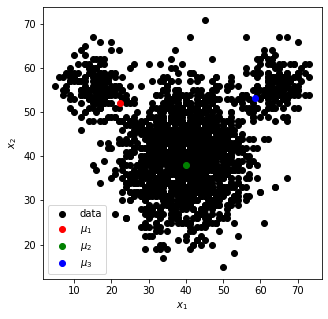

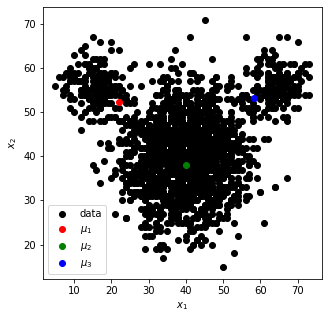

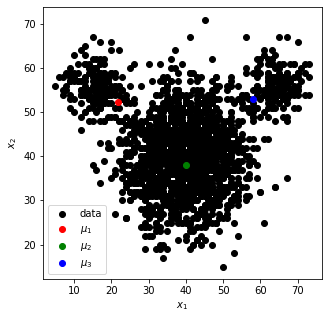

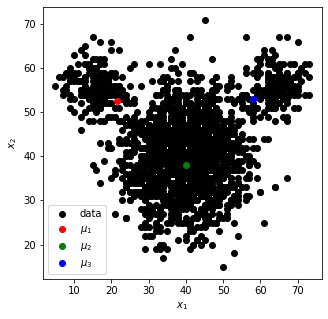

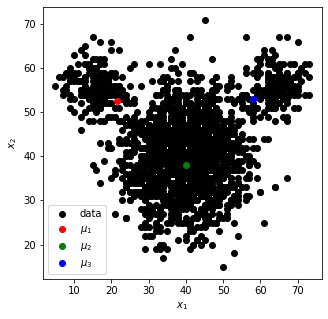

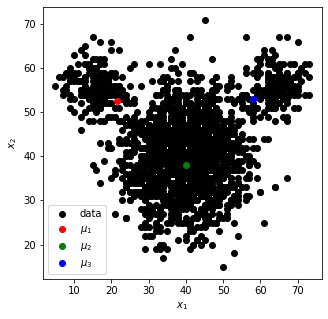

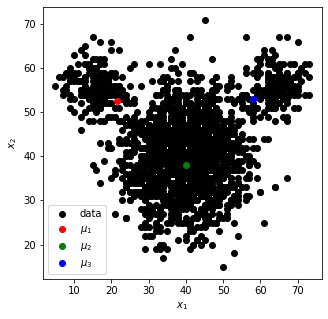

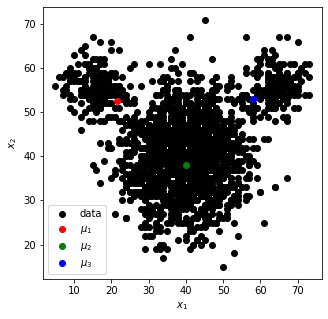

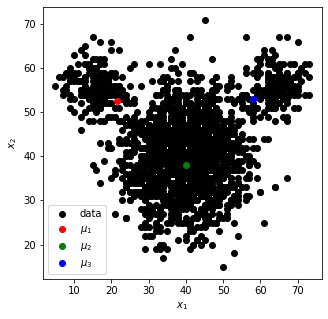

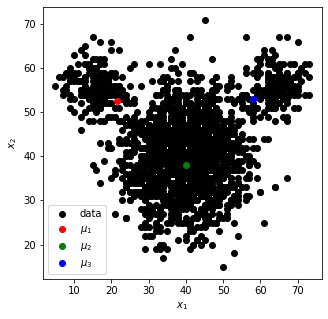

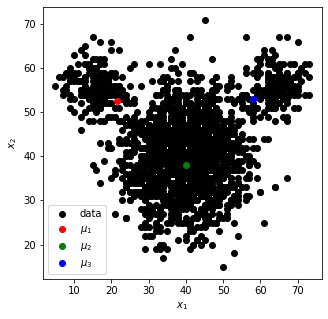

In [ ]:
k_means(35,3,data_mouse,centroids)

In order to obtain good results we need  a large number of iterations and still they are not great. One of the reasons that the k means doesn't work well is because the large number of data point in the center cycle compared to the outer cycles. If we use the mixture model it would take a big number of iteratios for the centroids ton converge but if we use the centroids we calculated here it would be much faster. And of course it would have given better results because the gaussian mixture model does not depend on the number of points in each cluster.

## Recap Chapter 6: More on logistic regression

### A. Logistic Regression With PyTorch (1 point)

Numpy is a great framework for general scientific computing, but it cannot utilize GPUs to accelerate numerical computations nor is it ideal for machine learning specific tasks. We will therefore use Pytorch, a widely used deep learning package. In fact, logistic regression can be seen as the minimal example of a neural network: it consist of a single neuron with a sigmoid activation function. You will learn more about neural networks later in the course. \\
The most important basic concept is that a Pytorch tensor is the same as a numpy array. In this worked out example we will implement logistic regression in Pytorch in the setting of the regession assignment of exercise sheet 3. You are ecouraged to run the following example and examine carefully each step as this will be an important reference to the next exercises. The following basic [tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) might be helpful to better understand Pytorch.

To train any Pytorch ML model, we need four things: a model definition, a criterion (a loss function), an optimizer (gradient descent for now; we will talk about other optimizers later), and a training routine.

First let's define the model, which we write as a class that inherits from `torch.nn.Module`. We will need one [linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer. Skim the Linear layer reference material. This time we do not need to worry about implementing basis functions, since the `torch.nn.Linear()` does this for us. The `forward` function simply computes the value of the prediction `y` given the model parameters. We will talk about why this is called "forward" later in the course.

In [ ]:
import torch
import numpy as np


In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2,1)

    def forward(self,x):
        y = torch.sigmoid(self.linear(x))
        return y

Defining the criterion and optimizer is a little bit easier because there are quite a few standard ones. Use the built-in torch functions to define a binary cross-entropy loss. \\
We implement batch gradient descent through torch.optim.SGD. This will implement gradient descent on the batch the model receives, since we are passing the whole dataset at once there is nothing stochastic in our case.



In [ ]:
model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

1. Let us first obtain our data from the logistic regression assignment from exercise sheet 3 again and process it as before. You can use your answers to problems 2 and 3 from last sheet for this. (1 pt)

In [ ]:
# Import training data
# This will donwload the training data to the virtual colab data folder
# Colab deletes the stored files every time you close your browser, so make sure to run this cell every time
!wget https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv

# Read training data
# Now you have access to the label T (0 for Male, 1 for Female), height, and weight for 10,000 data points 
data = pd.read_csv("01_heights_weights_genders.csv")
T = np.array([0. if x=='Male' else 1. for x in data['Gender'].values])
H = data['Height'].values
W = data['Weight'].values

print(H.mean())
print(W.mean())

# Scale the data to objects 'H_scaled' and 'W_scaled'
H_scaled=(H-H.mean())/H.std()
W_scaled=(W-W.mean())/W.std()

# Reshaping our targets array to have dimension (N,1) not (N,)
T=np.reshape(T,(len(T),1))

# Stack our H and W into an array 'X' of shape (N,2)
h=np.reshape(H,(len(H),1))
w=np.reshape(W,(len(W),1))
X=np.hstack((h,w))
print('The shape of input is ',X.shape)

--2022-05-11 10:33:54--  https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418121 (408K) [text/plain]
Saving to: ‘01_heights_weights_genders.csv’

01_heights_weights_ 100%[===================>] 408.32K  --.-KB/s    in 0.04s   

2022-05-11 10:33:54 (11.3 MB/s) - ‘01_heights_weights_genders.csv’ saved [418121/418121]

66.36755975482124
161.44035683283076
The shape of input is  (10000, 2)


Everything in torch needs to be a tensor - *including our dataset.*

In [ ]:
X_tensor = torch.from_numpy(X).to(torch.float)
T_tensor = torch.from_numpy(T).to(torch.float)

Now let's define the training routine. A key point about Pytorch is that it has two modes: training and evaluation. In training mode, the parameters of the model are allowed to be iteratively changed. In evaluation mode, they are fixed. Whenever you are plotting or calling the model to make predictions, make sure to call `model.eval()` beforehand. Before training, call `model.train()`. 

`model.train()` is the first step in the training routine. 
Then, we define a loop that does the following things:

- Zero's the gradient. This is important because the gradient of the loss function is what is updating our model weights. We don't want this to be accidentally doing weird things and then the wrong values update our weights.
- Call the model on our X values to make predictions.
- Evaluate the predictions using the loss.
- Evaluate the gradient of the loss (this is known as the *backward* pass; we will discuss why this is called this when we get to neural networks).
- Take an optimizer step.

In [ ]:
model.train()

for epoch in range(30000):
    optimizer.zero_grad()

    # forward pass
    Y_pred = model(X_tensor)

    # compute loss
    loss = criterion(Y_pred, T_tensor)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

3.2345123291015625
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305
49.96418380737305


Congratulations on training your first PyTorch model! :) Lastly, let's plot probabilistic predictions for each datapoint.

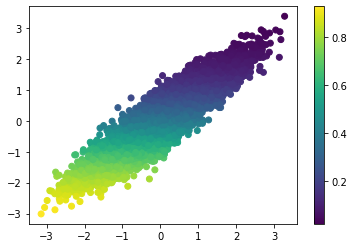

In [ ]:
model.eval()
c = [model(torch.tensor([h, w], dtype=torch.float)).detach().numpy() for h, w in zip(H_scaled, W_scaled)]
plt.scatter(H_scaled, W_scaled, c =c)
plt.colorbar()

### B. Star, Galaxy, or Quasar? (5 points)

A shortened version of what was in HW3. The data-processing part is dropped, you are only requested to do the PyTorch part. This will be a useful preparation for training neural networks in the rest of the course.

![alt text](https://www.sdss.org/wp-content/uploads/2014/05/segue.jpg)


In this problem, we will be extending our Pytorch logististic regression model to predict whether an observed object is a star, galaxy, or quasar.

**The Data**

We will be using data collected by the Sloan Digital Sky Survey ([SDSS](http://www.sdss.org/)) and released as part of Data Release 14. SDSS is a multi-spectral and spectroscopic survey telescope at Apache Point Observatory in New Mexico, USA. 

The telescope uses a camera of 30 CCDs which observe in different optical filter bands (u,g,r,i,z). The data used here is freely publicly available. 

Therefore we will be importing a table of 10,000 objects, for each of which we have the following information:
- class = tells us whether the object is a GALAXY, STAR, or QSO ("quasi-stellar object" or [quasar](https://en.wikipedia.org/wiki/Quasar))
- ra = [Right Ascension](https://en.wikipedia.org/wiki/Right_ascension)
- dec = Declination 
- [redshift](https://en.wikipedia.org/wiki/Redshift)


Magnitude in each of the following [filters](http://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp):
- u
- g
- r
- i
- z

We will not be needing almost any of the imaging data, so you don't need to understand how SDSS works, but if you're curious, you can read about it [here](http://www.sdss3.org/dr9/imaging/imaging_basics.php). 

The data you will be using in this exercise has already been preprocessed in the following ways:
- The 'class' feature has been converted to a set of labels (target array) `T`. Here, 0, 1, and 2 correspond to STAR, GALAXY, and QUASAR respectively.
- The rest of the features have been converted to a scaled array `X`.

Run the code below to load the data.

In [ ]:
# Let's import the processed data
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_labels.csv
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_features.csv

--2022-05-11 10:34:30--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250000 (244K) [text/plain]
Saving to: ‘Skyserver_SQL_labels.csv’

Skyserver_SQL_label 100%[===================>] 244.14K  --.-KB/s    in 0.03s   

2022-05-11 10:34:30 (7.74 MB/s) - ‘Skyserver_SQL_labels.csv’ saved [250000/250000]

--2022-05-11 10:34:30--  https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/Skyserver_SQL_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaitin

In [ ]:
T = pd.read_csv('/content/Skyserver_SQL_labels.csv').to_numpy().flatten()
X = pd.read_csv('/content/Skyserver_SQL_features.csv').to_numpy()

Now the data processing step: we will need a subset of the data to impartially evaluate the performance of our classifier. 

1. (1 points) $$\\ $$ First, shuffle your X and T arrays, in such a way that each row still corresponds to each row! Split your target array `T` into two arrays: `T_train` and `T_test` and corresponding two `X_train` and `X_test` arrays, where the train test contains 90% of the datapoints and the test dataset contains 10% of the datapoints.

In [ ]:
#First we need to transform the T array to one hot encode so we can work with multiclass logistic regresion
l=len(T)
Tnew=[]
for i in range(l):
  if (T[i]==0):
    Tnew.append([1,0,0])#STAR
  if (T[i]==1):
    Tnew.append([0,1,0])#GALAXY
  if (T[i]==2):
    Tnew.append([0,0,1])#quasar
T=np.reshape(Tnew,(len(T),3))

In [ ]:
#Here we split the data into train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split( X, T, test_size=0.1)


2. (0.5 points) $$\\ $$ Now we are ready to move onto the Pytorch part of the exercises. As in the exercises, convert your train and test arrays to torch tensors.

In [ ]:
X_train_tensor=torch.from_numpy(X_train).to(torch.float)
X_test_tensor=torch.from_numpy(X_test).to(torch.float)
T_train_tensor=torch.from_numpy(T_train).to(torch.float)
T_test_tensor=torch.from_numpy(T_test).to(torch.float)


3. (1.5 points) $$\\ $$  Extend your code for the Logistic Regression Pytorch model from the exercises for multiclass classification with more than two input parameters. Train your code again with the  cross entropy loss, using the SGD optimizer. You can use 15000 steps and a learning rate 0.02 as a starting point.

In [ ]:
# Here we define our class for the multiclass logistic regresion
class MCLregression(torch.nn.Module):
    def __init__(self):
        super(MCLregression, self).__init__()
        self.linear = torch.nn.Linear(8,3)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self,x):
        y = self.softmax(self.linear(x))
        return y

Now we are defining our model our criterion and our optimizer


In [ ]:
model = MCLregression()
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.02)

Now we are going to train our model.


In [ ]:
model.train()

for epoch in range(15000):
  optimizer.zero_grad()

  #foward pass
  y=model(X_train_tensor)
  # compute loss
  loss = criterion(y, T_train_tensor)
  if epoch% 1000 == 0:
      print(loss.item())
  # backward pass
  loss.backward()
  optimizer.step()


1.143081545829773
0.8437595963478088
0.7976219058036804
0.7785555720329285
0.7668278813362122
0.7582774758338928
0.7514470219612122
0.7456797361373901
0.7406303882598877
0.7360979318618774
0.7319555878639221
0.7281171679496765
0.7245219945907593
0.7211251854896545
0.7178937196731567


Although we aim to minimize the loss function, it hardly tells us as humans how well the classification scheme is performing. To get a better understanding of performance, we look at *accuracy*, or the fraction of correct predictions from total predictions. 

4. (2 points) $$\\ $$ Define the function `accuracy` which takes as inputs the targets and the predictions by the model and use it to evaluate the accuracy of our logistic regression model on the train and test datasets.

In [ ]:
#Here we define a fuction that calculates the accuracy
def accuracy(predictions,test):
  t=float(sum(test==predictions))/test.shape[0]
  return t

In [ ]:
model.eval()
predictions=torch.argmax(model(X_test_tensor),axis=1)
t=torch.argmax(T_test_tensor,axis=1)
print("The accuracy is",accuracy(predictions,t))

The accuracy is 0.881
